**Installations**

In [1]:
%%capture --no-stderr
%pip install -U langgraph langchain langchain-openai
!pip install pycountry
!pip install ipaddress

**Mounting Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Thesis Code

Mounted at /content/drive
/content/drive/MyDrive/Thesis Code


**Importing Dependencies**

In [3]:
import getpass
import ast
import os
import re
import json
from single_agents.react_agent import *
from evaluations.asrank.asrank_eval import *
from evaluations.bogons.bogons_eval import *
from Workflows.workflow_multi_source_knowledge_retreival import *
from prompts import *

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(
/content/drive/MyDrive/Thesis Code/evaluations/asrank/asrank_eval.py:5: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from Workflows.workflow_knowledge_retreival import *


**API Keys Management**

In [4]:
os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


**Loading Models**

In [5]:
from langchain_openai import ChatOpenAI
from tools.as2org.as2org_tools import *
from tools.asrank.as_rank_tools import *
from tools.peeringdb.peeringdb_tools import *
from evaluations.as2org.as2org_eval import *

model = ChatOpenAI(model="gpt-4.1", temperature=0.0)
tools = [find_org_largest_asn, org_as_count, as2org]
judge_model = ChatOpenAI(model="gpt-4.1-nano", temperature=0.0)
model = model.bind_tools(tools)

**Task 1 - Largest AS in a given organization**

In [10]:
orgs_eval_dataset_path = 'evaluations/as2org/orgs_dataset.json'
with open(orgs_eval_dataset_path, 'r') as f:
    orgs_data = json.load(f)

In [11]:
orgs_data = dict(list(orgs_data.items())[:50])

Ground truth: 174 



/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


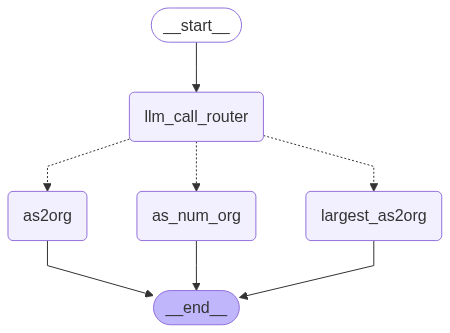

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Cogent Communications'}, 'id': 'call_c9cT9YMKpwCVgSoOwTn5wx4Z', 'type': 'tool_call'}]
174
Agent answer: 174 

Ground truth: 224 



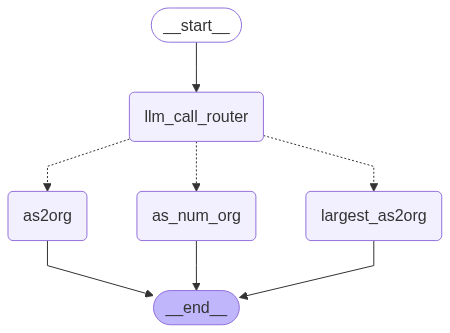

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'SIKT - KUNNSKAPSSEKTORENS TJENESTELEVERANDOR'}, 'id': 'call_PA7M4yqmrqh9WoZ8hWaiVaPq', 'type': 'tool_call'}]
224
Agent answer: 224 

Ground truth: 25233 



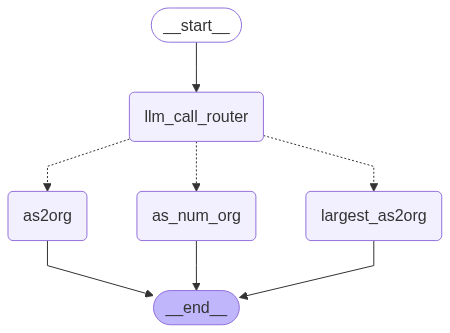

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'ARABIAN INTERNET & COMMUNICATIONS SERVICES CO.LTD'}, 'id': 'call_GEWJCDkaNxnFfdVPKH2JaIBM', 'type': 'tool_call'}]
25233
Agent answer: 25233 

Ground truth: 50760 



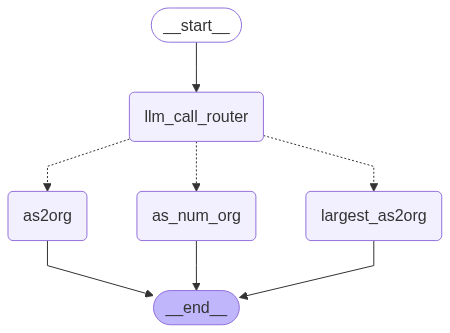

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Mozhaisk Computer Networks Ltd.'}, 'id': 'call_DNCLFzbyWBQIAJfLWRdiybkQ', 'type': 'tool_call'}]
50760
Agent answer: 50760 

Ground truth: 49685 



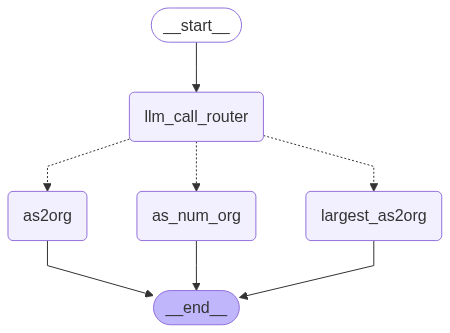

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Signet B.V.'}, 'id': 'call_fkYiqUdJqSrFT0v6Yq5gqcOi', 'type': 'tool_call'}]
49685
Agent answer: 49685 

Ground truth: 11404 



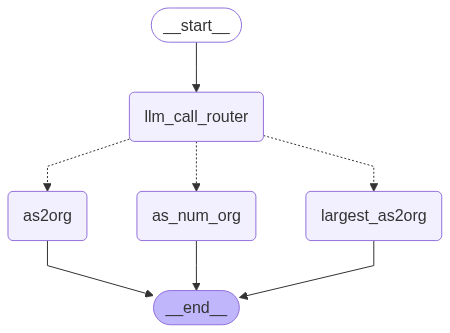

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Wave Broadband'}, 'id': 'call_byDoIyJHOzbXfp3zULvYDm4L', 'type': 'tool_call'}]
11404
Agent answer: 11404 

Ground truth: 5466 



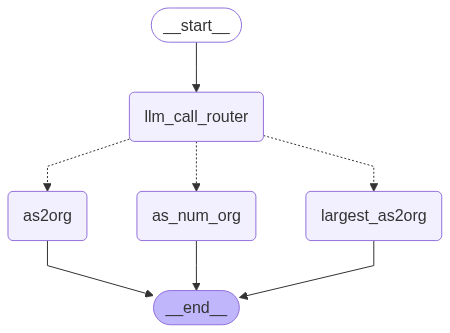

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Eircom Limited'}, 'id': 'call_TxMCECLukarbPmkXcKiEXfDM', 'type': 'tool_call'}]
5466
Agent answer: 5466 

Ground truth: 16050 



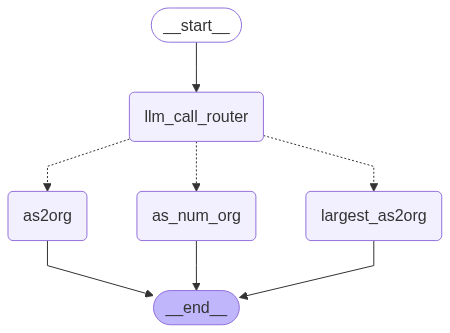

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Refinitiv Limited'}, 'id': 'call_7mKmrC3StmIJolY2taC3Ax5w', 'type': 'tool_call'}]
16050
Agent answer: 16050 

Ground truth: 45267 



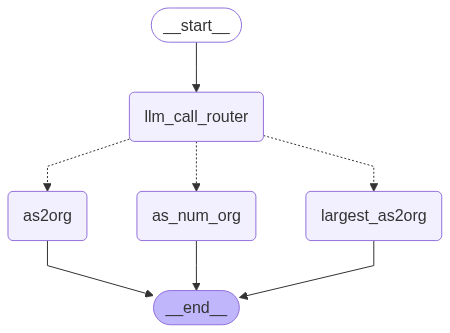

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Lightwire Limited'}, 'id': 'call_IY0CNoSohN2OH3HFJPlmZfSH', 'type': 'tool_call'}]
45267
Agent answer: 45267 

Ground truth: 50467 



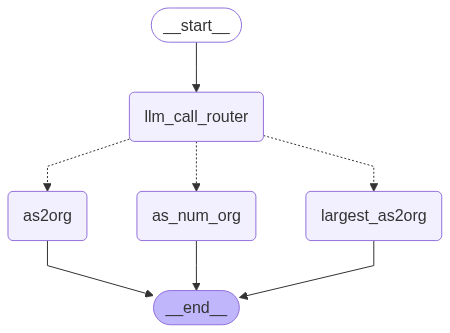

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Beskid Media Sp. z o.o.'}, 'id': 'call_IzcNRKagbl2o5mVdNWD5PPyC', 'type': 'tool_call'}]
50467
Agent answer: 50467 

Ground truth: 18747 



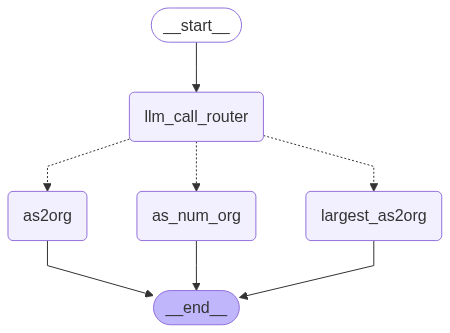

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'IFX Corporation'}, 'id': 'call_CmrzwBKu2avxpiZAqMtqimLg', 'type': 'tool_call'}]
18747
Agent answer: 18747 

Ground truth: 8422 



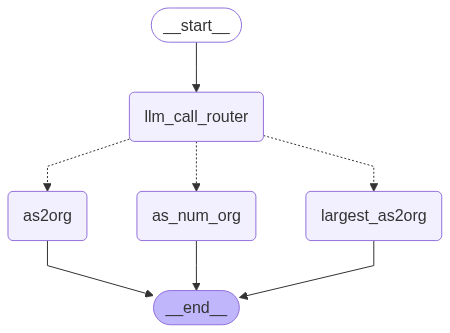

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'NetCologne Gesellschaft fur Telekommunikation mbH'}, 'id': 'call_MrEhjzLVhicQIplAe9S3VtPz', 'type': 'tool_call'}]
8422
Agent answer: 8422 

Ground truth: 11776 



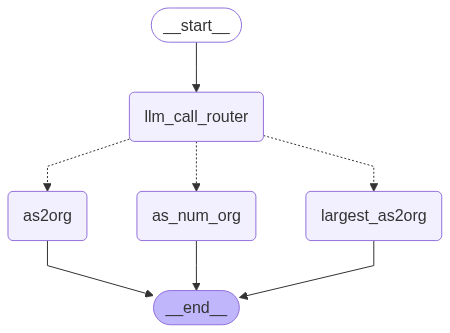

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Breezeline'}, 'id': 'call_CHFHZt9mzeFknMpSkTk0jRBs', 'type': 'tool_call'}]
11776
Agent answer: 11776 

Ground truth: 25255 



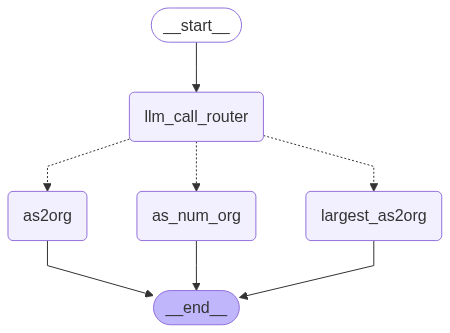

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Hutchison Drei Austria GmbH'}, 'id': 'call_zBoYpmUyYbvOXRxiK5mdFI9H', 'type': 'tool_call'}]
25255
Agent answer: 25255 

Ground truth: 14335 



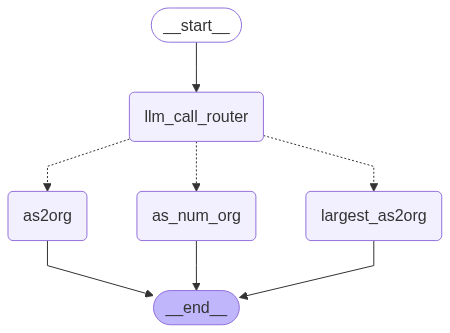

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'VC3, Inc.'}, 'id': 'call_BG225UqoCb0c3xZ8nRWqd4nC', 'type': 'tool_call'}]
14335
Agent answer: 14335 

Ground truth: 42926 



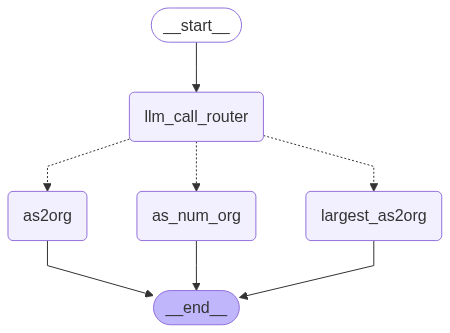

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Radore Veri Merkezi Hizmetleri A.S.'}, 'id': 'call_7kZvqGc6ZXjiXWJVsAxD8pav', 'type': 'tool_call'}]
42926
Agent answer: 42926 

Ground truth: 17676 



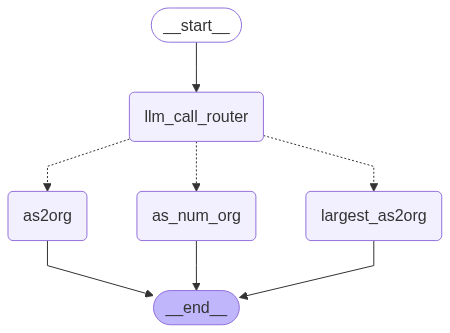

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'SoftBank Corp.'}, 'id': 'call_3hU7ch8AXiSfNf2DPjopON0S', 'type': 'tool_call'}]
17676
Agent answer: 17676 

Ground truth: 36994 



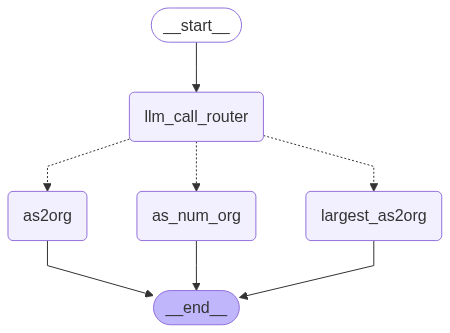

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Vodacom'}, 'id': 'call_3fUnkre1HflOw8Os7s1u1RQa', 'type': 'tool_call'}]
36994
Agent answer: 36994 

Ground truth: 23889 



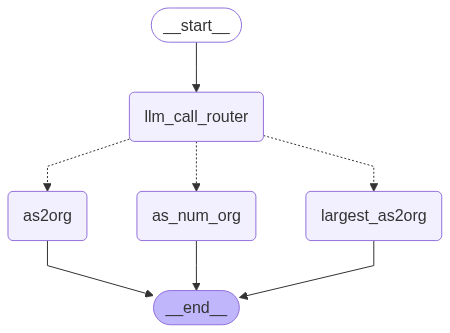

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Mauritius Telecom Ltd'}, 'id': 'call_a9y5ZWp0aRxG1UecBa2qoZr9', 'type': 'tool_call'}]
23889
Agent answer: 23889 

Ground truth: 7155 



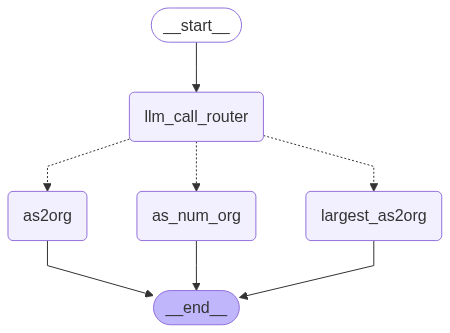

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'ViaSat,Inc.'}, 'id': 'call_ioazh80HPuBuFSU6EOYIlSp0', 'type': 'tool_call'}]
7155
Agent answer: 7155 

Ground truth: 5409 



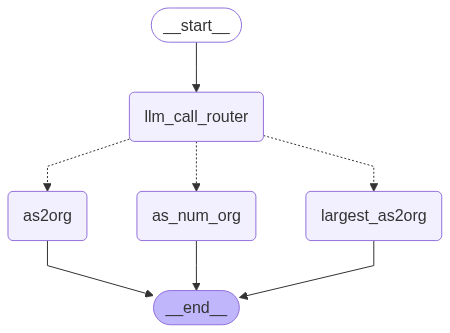

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'toplink GmbH'}, 'id': 'call_jTJ8l4IhatTrqYjyDzsVJILn', 'type': 'tool_call'}]
5409
Agent answer: 5409 

Ground truth: 22001 



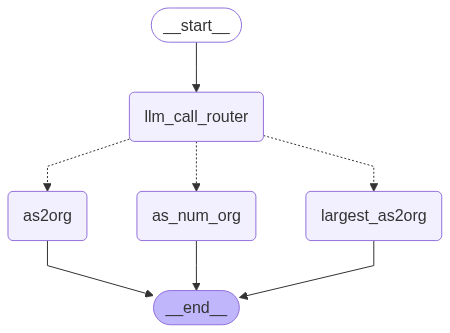

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Life Technologies Corp.'}, 'id': 'call_QfCAOwhYqHCSKn0XfVyNnJ8J', 'type': 'tool_call'}]
22001
Agent answer: 22001 

Ground truth: 8116 



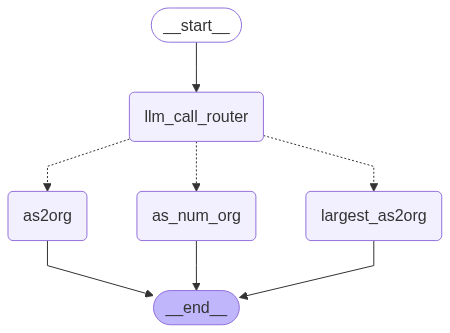

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Guidant Corporation'}, 'id': 'call_QSrhGwuWfYjY3U0QJ7fEwfSv', 'type': 'tool_call'}]
8116
Agent answer: 8116 

Ground truth: 43348 



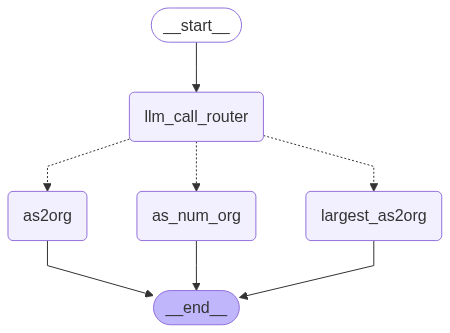

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Tatarinova Alla Ivanovna'}, 'id': 'call_wES7HF56WYtTNAQhWBR8f5pU', 'type': 'tool_call'}]
43348
Agent answer: 43348 

Ground truth: 4309 



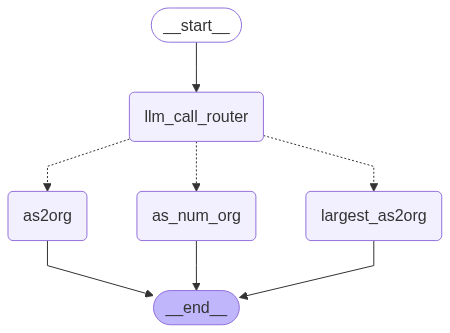

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'FMR LLC'}, 'id': 'call_pSnZryxL8lQpwkhO0PZpBmHj', 'type': 'tool_call'}]
4309
Agent answer: 4309 

Ground truth: 29259 



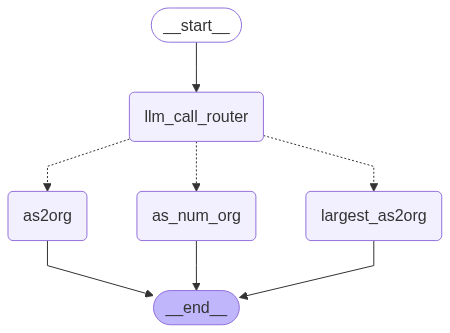

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'IABG Teleport GmbH'}, 'id': 'call_UykbCa2Qp500spgLCfE4iySH', 'type': 'tool_call'}]
29259
Agent answer: 29259 

Ground truth: 13527 



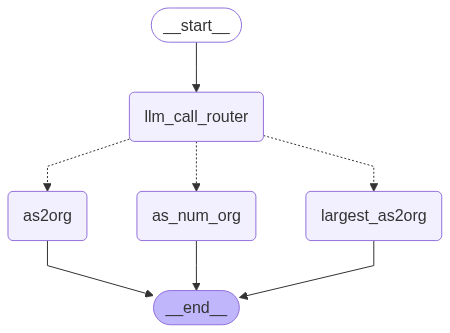

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Gooflare LLC'}, 'id': 'call_eznfp89pQtdbaDs6WsDbqx5a', 'type': 'tool_call'}]
13527
Agent answer: 13527 

Ground truth: 8970 



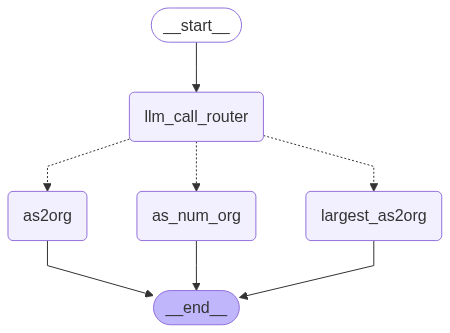

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Wroclaw Centre of Networking and Supercomputing'}, 'id': 'call_nn5tSv42d4s5ImHNM7mKrtBN', 'type': 'tool_call'}]
8970
Agent answer: 8970 

Ground truth: 28545 



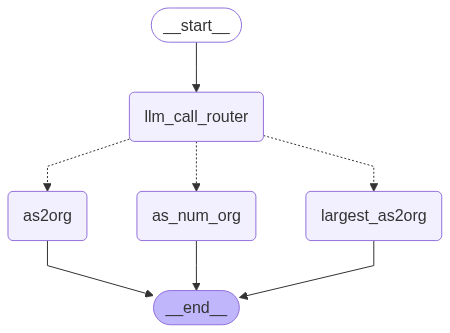

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Cablemas Telecomunicaciones SA de CV'}, 'id': 'call_HrrZcapHW0o6KdC1rFamHlTL', 'type': 'tool_call'}]
28545
Agent answer: 28545 

Ground truth: 48854 



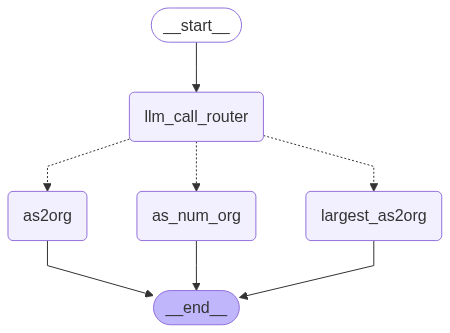

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'team.blue Denmark A/S'}, 'id': 'call_Hsm8dcukDSoZmILNwoqPvTqe', 'type': 'tool_call'}]
48854
Agent answer: 48854 

Ground truth: 22261 



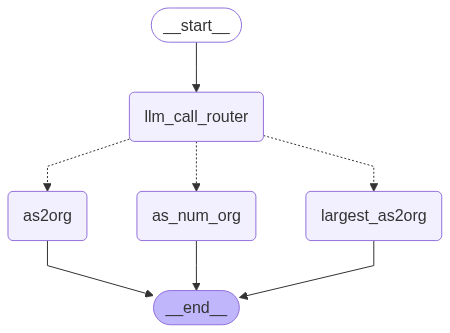

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'San Diego County Water Authority'}, 'id': 'call_crYRjXokyzFOn6HZpyf3tfNs', 'type': 'tool_call'}]
22261
Agent answer: 22261 

Ground truth: 6059 



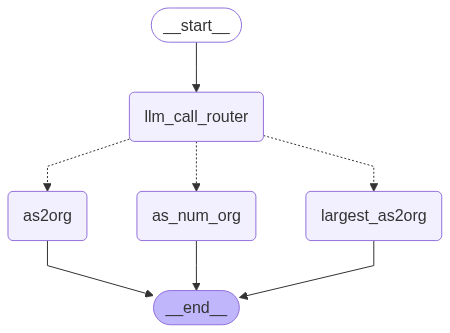

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'University System of Maryland'}, 'id': 'call_Jrk0JqurlRgadM6U9QgfxssI', 'type': 'tool_call'}]
6059
Agent answer: 6059 

Ground truth: 42517 



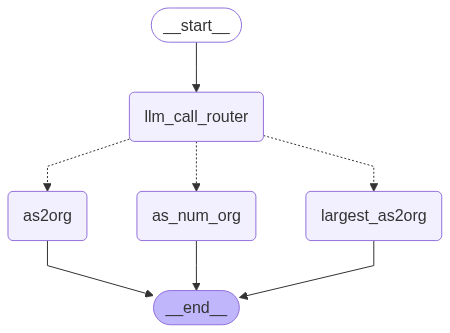

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Schiphol Telematics B.V.'}, 'id': 'call_UfRyk1oONLyk6mU1wmHnhe43', 'type': 'tool_call'}]
42517
Agent answer: 42517 

Ground truth: 20791 



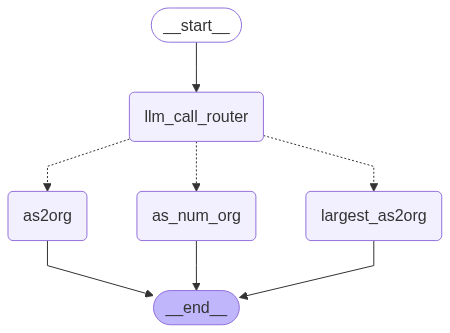

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'BitPoint AG'}, 'id': 'call_FDcuE0wjABhZHCvo7JyM8jk6', 'type': 'tool_call'}]
20791
Agent answer: 20791 

Ground truth: 721 



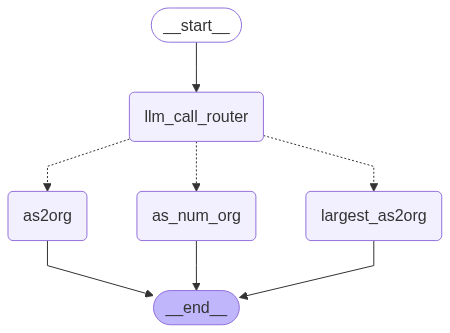

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'DoD Network Information Center'}, 'id': 'call_yKaxeaYWxsU3Jy2tdhruDGhP', 'type': 'tool_call'}]
721
Agent answer: 721 

Ground truth: 26485 



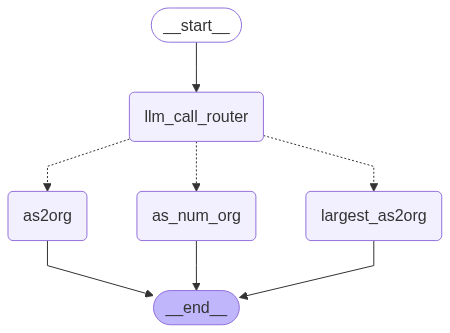

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Six Continents Hotels, Inc.'}, 'id': 'call_Z6cHBXV3lJPlRzFRa20XZwS9', 'type': 'tool_call'}]
26485
Agent answer: 26485 

Ground truth: 31742 



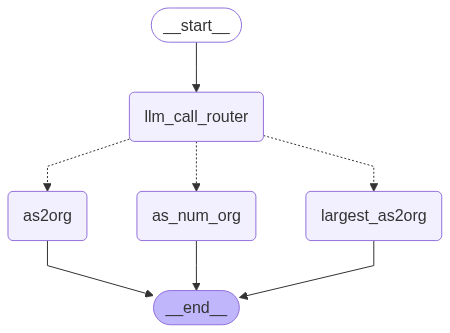

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Sota Solutions Ltd.'}, 'id': 'call_Z1z6R4TyDHXUJeFYEI1xvu5J', 'type': 'tool_call'}]
31742
Agent answer: 31742 

Ground truth: 745 



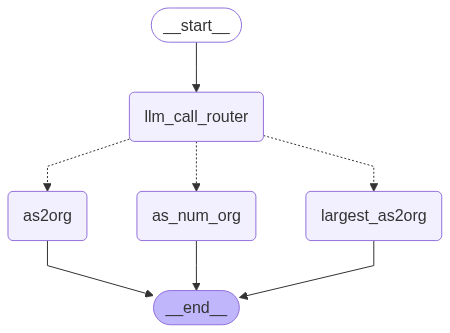

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Air Force Systems Networking'}, 'id': 'call_tPCTtFsCABo7gNneZFvwxnBx', 'type': 'tool_call'}]
745
Agent answer: 745 

Ground truth: 160 



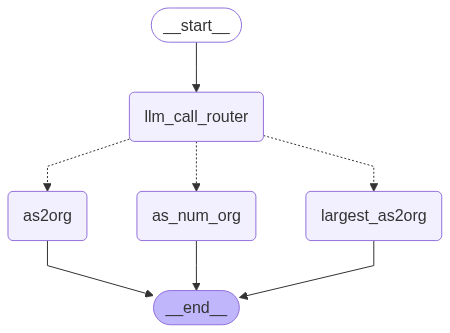

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'The University of Chicago'}, 'id': 'call_BhqVab2Qm7qR4tyVqbDYnzHj', 'type': 'tool_call'}]
160
Agent answer: 160 

Ground truth: 24151 



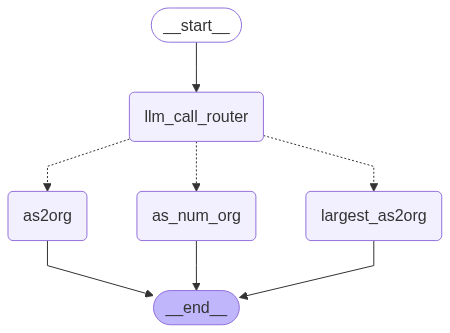

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'China Internet Network Infomation Center'}, 'id': 'call_vEwPa5QBR828Jp9XlsNNNVEh', 'type': 'tool_call'}]
24151
Agent answer: 24151 

Ground truth: 54003 



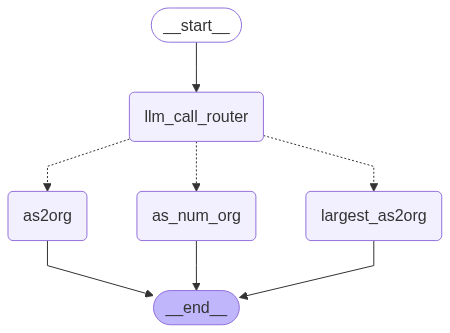

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Urban Lending Solutions'}, 'id': 'call_2MuBGOl1NBJeNGhUjnRzaTRr', 'type': 'tool_call'}]
54003
Agent answer: 54003 

Ground truth: 11783 



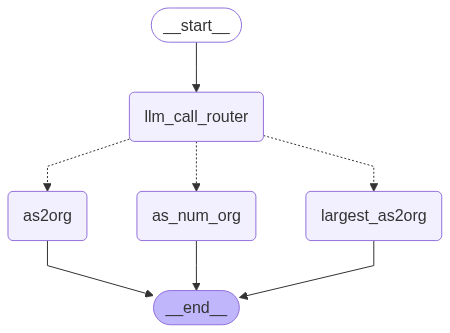

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Brooklyn Law School'}, 'id': 'call_EqBoWiDGP8omWd5GXviO7C6k', 'type': 'tool_call'}]
11783
Agent answer: 11783 

Ground truth: 9500 



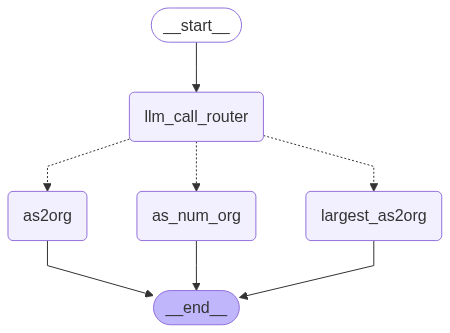

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'One New Zealand Group Limited'}, 'id': 'call_QPkNK0cmrnwllmdCwj2zktw8', 'type': 'tool_call'}]
9500
Agent answer: 9500 

Ground truth: 46887 



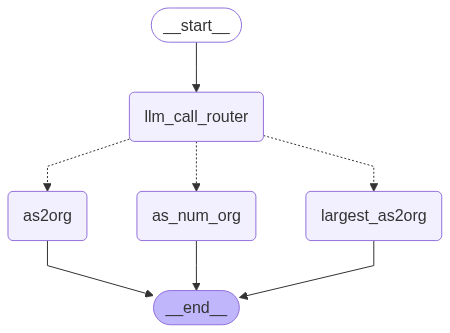

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Crown Castle Fiber LLC'}, 'id': 'call_WFy7GQ2whBjEGw4VooWRaoMT', 'type': 'tool_call'}]
46887
Agent answer: 46887 

Ground truth: 15975 



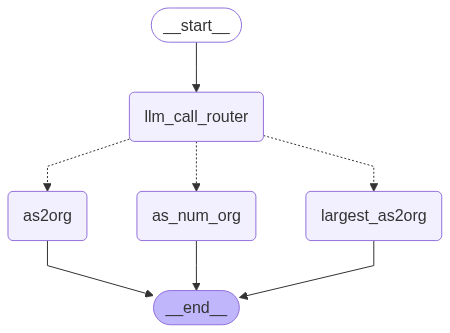

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Hadara Technologies Private Shareholding Company'}, 'id': 'call_c9AYuS3nk6m9Kvc8qjn0NO8A', 'type': 'tool_call'}]
15975
Agent answer: 15975 

Ground truth: 26096 



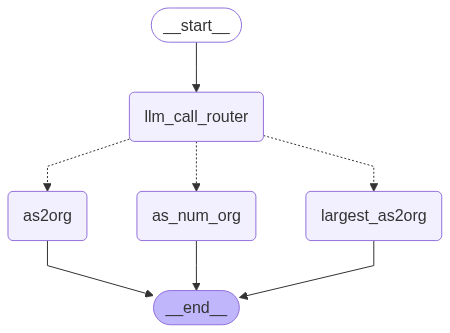

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Lodden Services'}, 'id': 'call_9N1y6b8dZGxj6QyaiWPEYnxU', 'type': 'tool_call'}]
26096
Agent answer: 26096 

Ground truth: 28258 



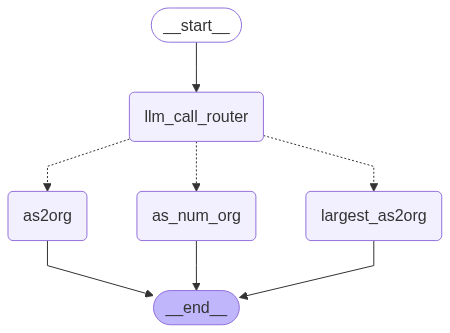

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'VERO S.A'}, 'id': 'call_ZrRKFdevvUMRpcYpaN86HQUE', 'type': 'tool_call'}]
28258
Agent answer: 28258 

Ground truth: 49532 



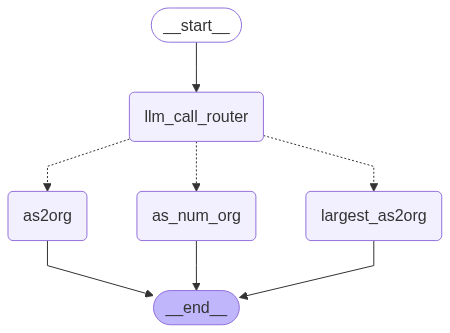

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Eonix Corporation'}, 'id': 'call_wUQFHewkQBmQtWruoLj9xvvh', 'type': 'tool_call'}]
49532
Agent answer: 49532 

Ground truth: 200656 



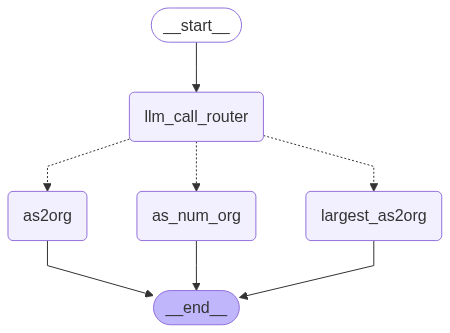

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'Nokia Solutions and Networks Oy'}, 'id': 'call_VtCOPKI2GaB9rLECNoF1ia3e', 'type': 'tool_call'}]
200656
Agent answer: 200656 

Ground truth: 40954 



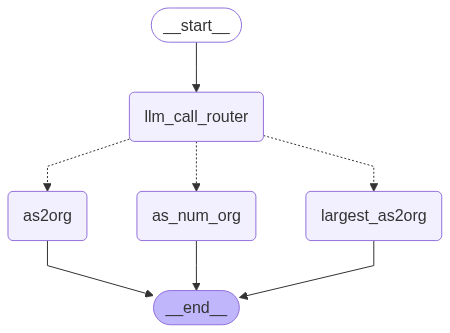

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'find_org_largest_asn', 'args': {'org': 'JM Family Enterprises Inc.'}, 'id': 'call_6zBMpeFbAsidrPuMNh9vm68J', 'type': 'tool_call'}]
40954
Agent answer: 40954 

Accuracy: 74.0 %



In [12]:
largest_as2org_accuracy = eval_largest_as_dataset("Give a short answer to the following question:",
                                              model,
                                              judge_model=model,
                                              model_type='Route',
                                              tools=tools,
                                              test_set=orgs_data)

**Task 2 - Number of autonomous systems which organization owns**

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


Ground truth: 17 



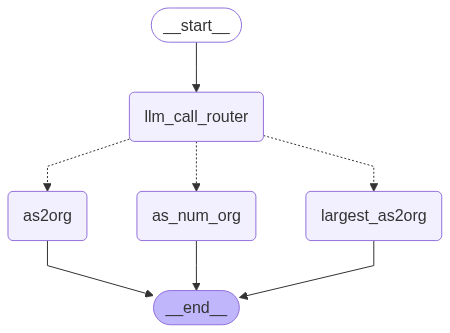

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Cogent Communications'}, 'id': 'call_mm9D36H2AlFgCjAIVgBPhzFD', 'type': 'tool_call'}]
17
Agent answer: 17 

Ground truth: 1 



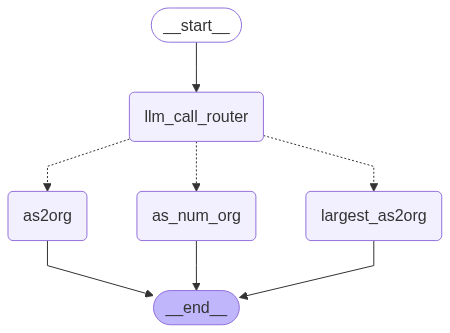

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'SIKT - KUNNSKAPSSEKTORENS TJENESTELEVERANDOR'}, 'id': 'call_TkbdEPo7gJeS55yjaUxSh1Hr', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 6 



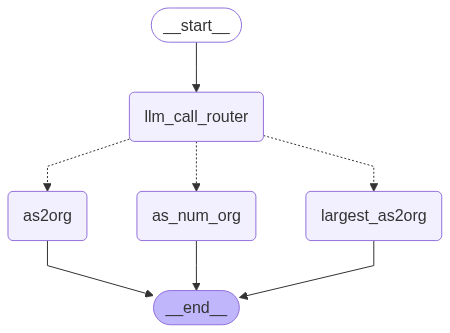

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'ARABIAN INTERNET & COMMUNICATIONS SERVICES CO.LTD'}, 'id': 'call_gEza5IFlbq3JgJR7ZdlZQbYW', 'type': 'tool_call'}]
6
Agent answer: 6 

Ground truth: 1 



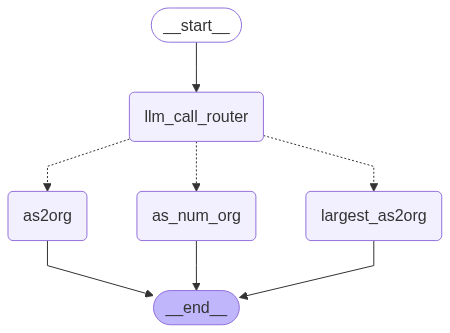

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Mozhaisk Computer Networks Ltd.'}, 'id': 'call_R2k2gGiLpP91nl0YWlb1CSiK', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 9 



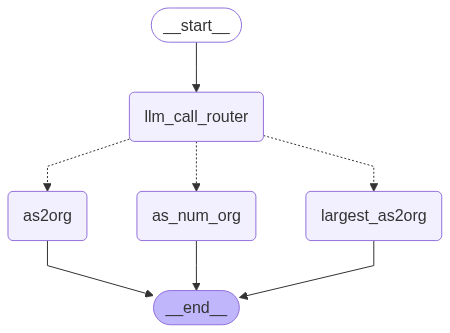

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Signet B.V.'}, 'id': 'call_oGafAT5M4IpfaMwhJSwONvXp', 'type': 'tool_call'}]
9
Agent answer: 9 

Ground truth: 17 



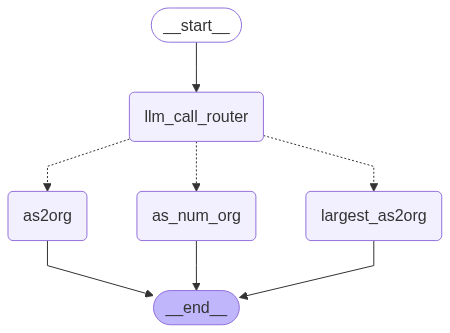

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Wave Broadband'}, 'id': 'call_GYGyUCRbxSl3LfQQXZYfx174', 'type': 'tool_call'}]
17
Agent answer: 17 

Ground truth: 1 



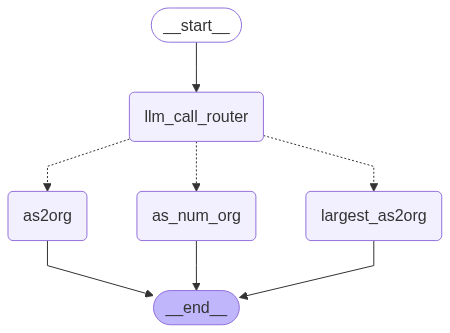

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Eircom Limited'}, 'id': 'call_RXlIiUAMcxvmRVip5guUB7SJ', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 3 



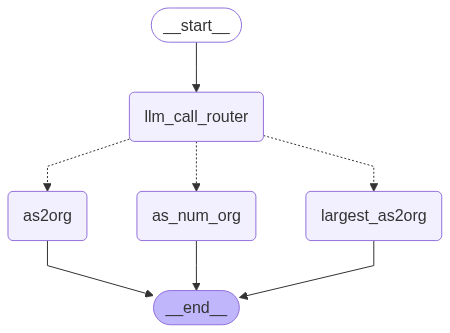

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Refinitiv Limited'}, 'id': 'call_fdWo82w5hRbwMMn3M65O7L6J', 'type': 'tool_call'}]
3
Agent answer: 3 

Ground truth: 1 



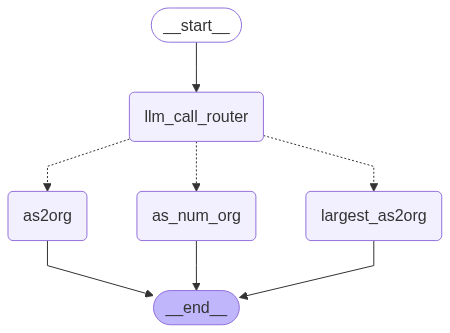

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Lightwire Limited'}, 'id': 'call_1U1K6JlTDGJiF9civPjwX0bz', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 3 



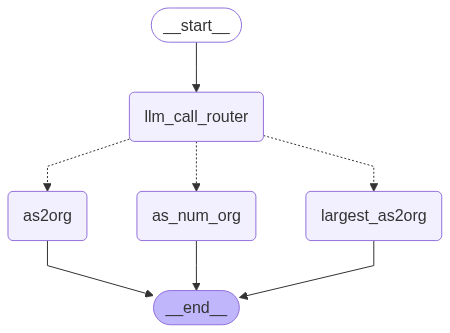

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Beskid Media Sp. z o.o.'}, 'id': 'call_LBq8wlmSnnzNiRtrX3az5Svc', 'type': 'tool_call'}]
3
Agent answer: 3 

Ground truth: 1 



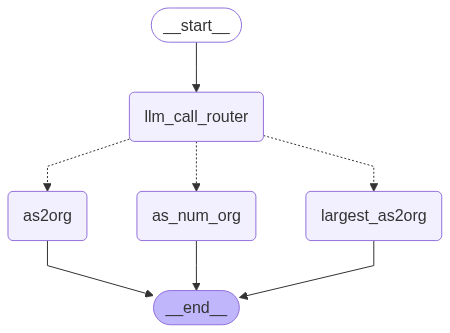

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'IFX Corporation'}, 'id': 'call_mNHo3hxEPolWgxj2f81c1wc5', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 1 



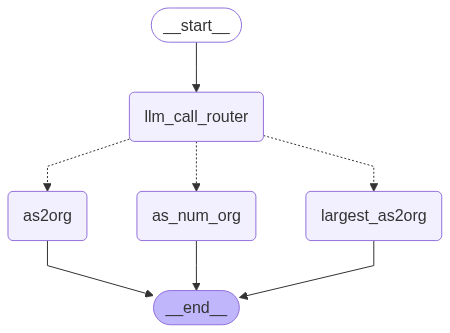

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'NetCologne Gesellschaft fur Telekommunikation mbH'}, 'id': 'call_ouGa9kgEkIp8SEUX3NW9FhIr', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 18 



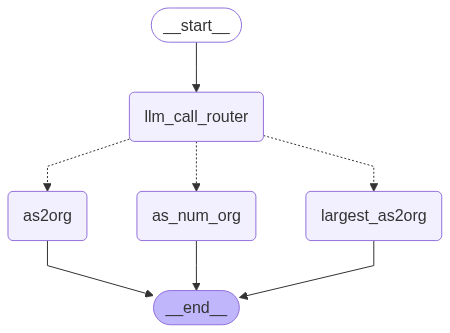

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Breezeline'}, 'id': 'call_ku55HMwWwA7feVHTaiL3cLB4', 'type': 'tool_call'}]
18
Agent answer: 18 

Ground truth: 5 



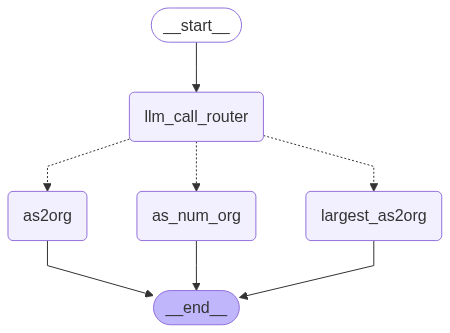

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Hutchison Drei Austria GmbH'}, 'id': 'call_hXGSTOR1PVNkeWMIvvv06JpH', 'type': 'tool_call'}]
5
Agent answer: 5 

Ground truth: 4 



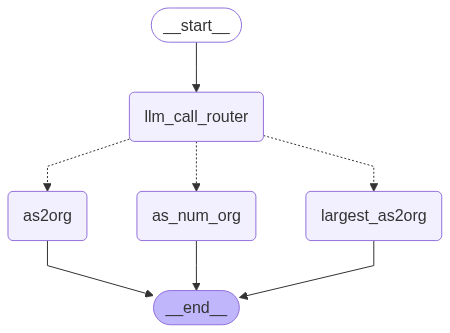

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'VC3, Inc.'}, 'id': 'call_kE1njfxedpIUtYshZmD4TiFB', 'type': 'tool_call'}]
4
Agent answer: 4 

Ground truth: 1 



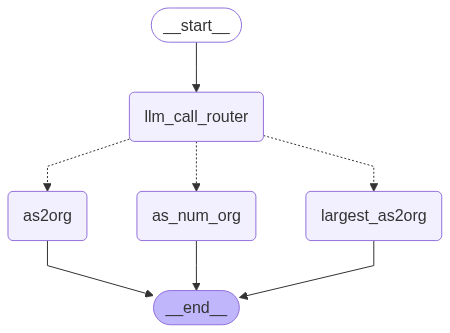

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Radore Veri Merkezi Hizmetleri A.S.'}, 'id': 'call_NqRZ6CBdn40tAkyJR7fh8ogs', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 7 



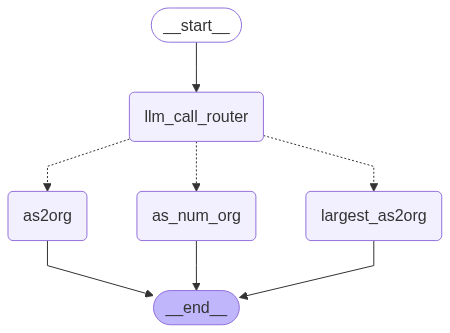

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'SoftBank Corp.'}, 'id': 'call_4DUPmHdYt6YE7DJanNoPVBaj', 'type': 'tool_call'}]
7
Agent answer: 7 

Ground truth: 3 



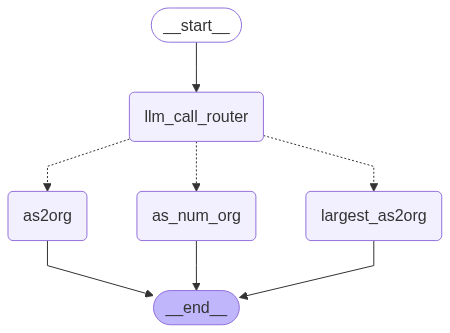

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Vodacom'}, 'id': 'call_GaI1NkcTZCOpBzX3HiiBykRl', 'type': 'tool_call'}]
3
Agent answer: 3 

Ground truth: 2 



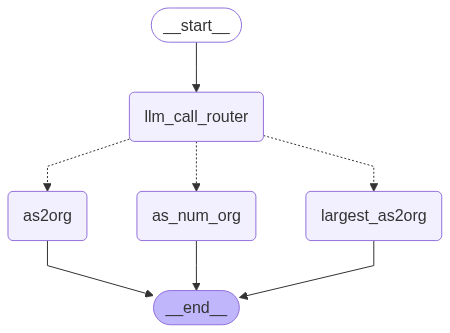

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Mauritius Telecom Ltd'}, 'id': 'call_SRpihBDDwqUaTdguzggRTssF', 'type': 'tool_call'}]
2
Agent answer: 2 

Ground truth: 15 



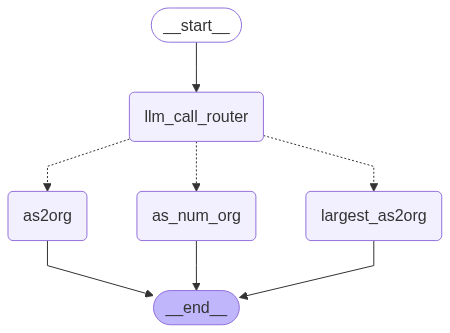

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'ViaSat,Inc.'}, 'id': 'call_n0KbzpVPsdvOwUVup5sTyKN4', 'type': 'tool_call'}]
15
Agent answer: 15 

Ground truth: 1 



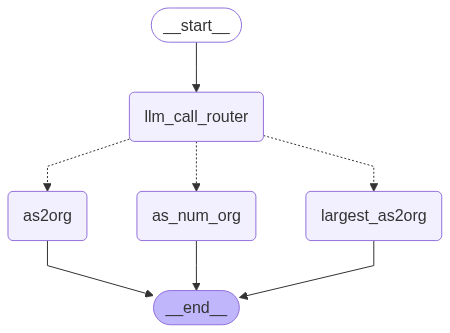

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'toplink GmbH'}, 'id': 'call_fSelffEK8pEeMgkcpU6h3s0f', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 2 



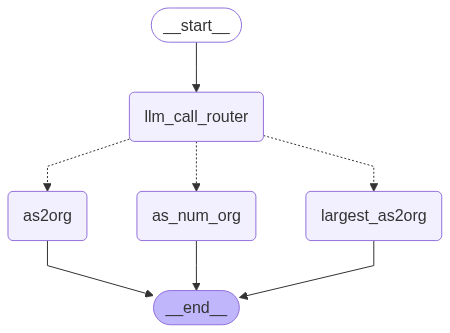

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Life Technologies Corp.'}, 'id': 'call_wpjNgWmaDyY9w1PpGlMJV1aT', 'type': 'tool_call'}]
2
Agent answer: 2 

Ground truth: 1 



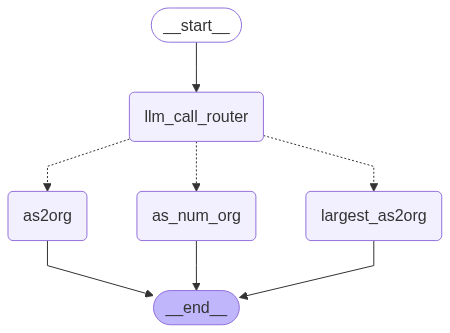

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Guidant Corporation'}, 'id': 'call_vBWs5lehf86OjqyvOH6GtXaq', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 1 



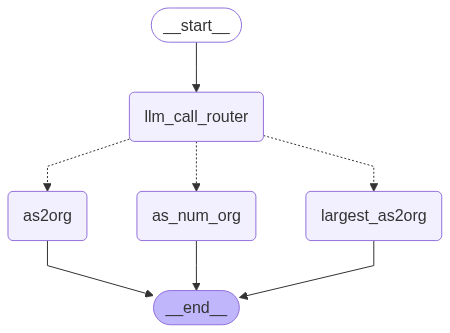

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Tatarinova Alla Ivanovna'}, 'id': 'call_U6stvt8BZNKLYAD6k7xgfnWc', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 1 



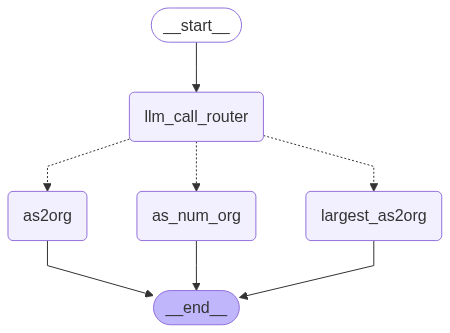

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'FMR LLC'}, 'id': 'call_b32bafmpmHitd4mnjlcSFGWT', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 1 



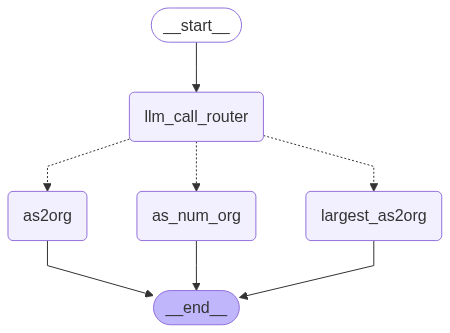

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'IABG Teleport GmbH'}, 'id': 'call_geCS3zvsvKeoS0Eivxdf6s0J', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 1 



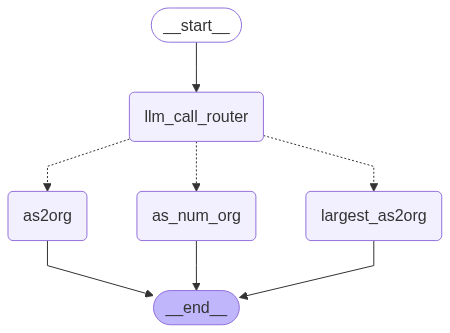

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Gooflare LLC'}, 'id': 'call_PkgyRLBHop91nufOFKxhiycu', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 2 



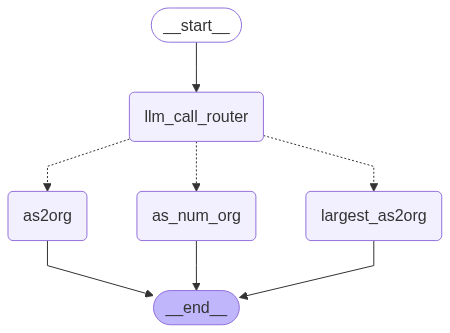

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Wroclaw Centre of Networking and Supercomputing'}, 'id': 'call_EIKTJySmjN6I2mVD4xjkp7Ug', 'type': 'tool_call'}]
2
Agent answer: 2 

Ground truth: 11 



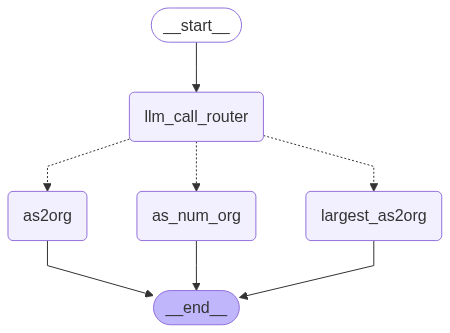

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Cablemas Telecomunicaciones SA de CV'}, 'id': 'call_QrJLSj33Ch3Z2Z1qoe8F0Rqr', 'type': 'tool_call'}]
11
Agent answer: 11 

Ground truth: 8 



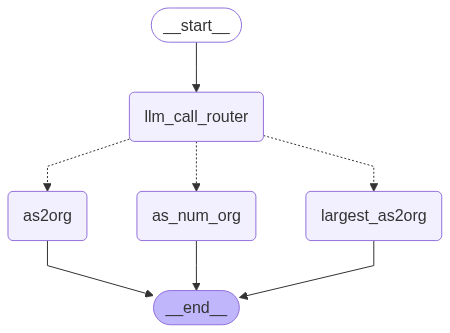

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'team.blue Denmark A/S'}, 'id': 'call_56J4mXLsifURhCZ9oEbqCvg2', 'type': 'tool_call'}]
8
Agent answer: 8 

Ground truth: 1 



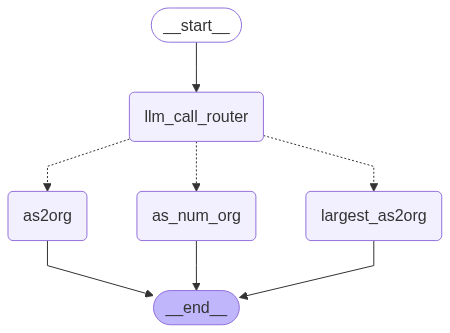

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'San Diego County Water Authority'}, 'id': 'call_UVnQUJ5qJTkY2ndjvzE9HmEP', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 1 



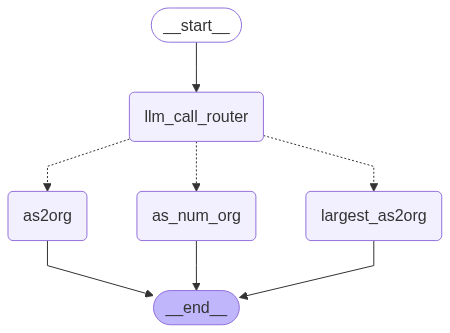

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'University System of Maryland'}, 'id': 'call_khLGou3fItVN7nZyAk5Htjxa', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 1 



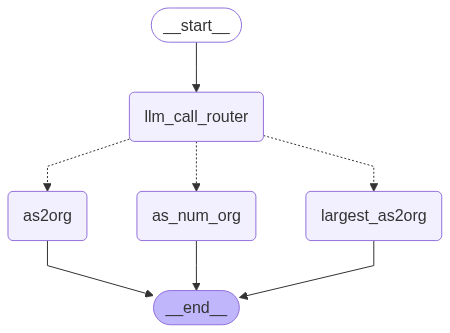

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Schiphol Telematics B.V.'}, 'id': 'call_7RGeovwA4D9W3k2L1QEofGRD', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 1 



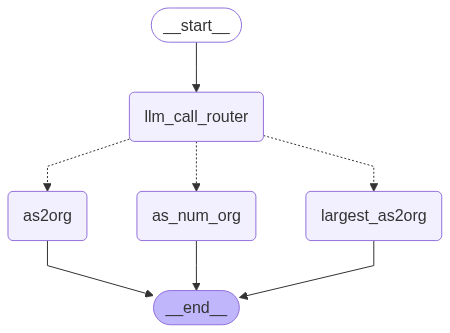

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'BitPoint AG'}, 'id': 'call_9X0AnSmkhEYtk5upqm0QPgVm', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 973 



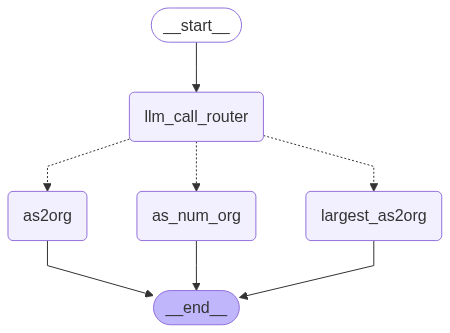

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'DoD Network Information Center'}, 'id': 'call_YtC7jNQPCTN2xFFzcUhPZqAQ', 'type': 'tool_call'}]
973
Agent answer: 973 

Ground truth: 1 



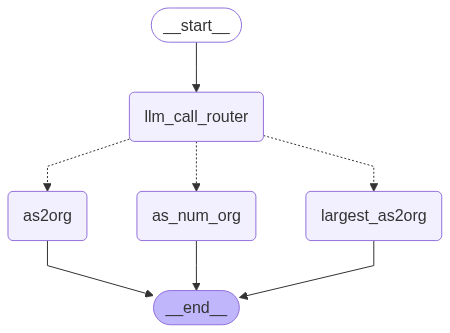

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Six Continents Hotels, Inc.'}, 'id': 'call_nr6X5vwkICIOiGiyT670NofU', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 1 



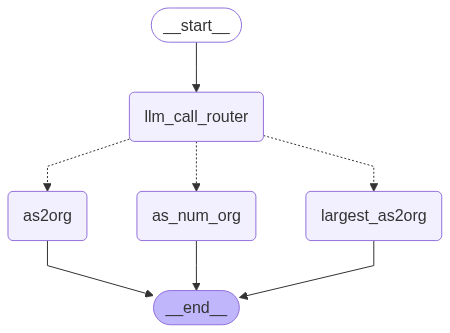

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Sota Solutions Ltd.'}, 'id': 'call_RTjTJmQHh9zifdn0wdSbaHRH', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 237 



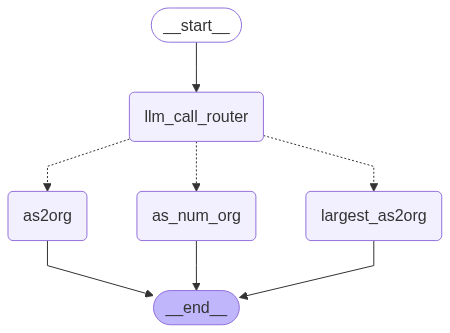

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Air Force Systems Networking'}, 'id': 'call_tJmOhkOGbGNDZA1tzdcdGXQR', 'type': 'tool_call'}]
237
Agent answer: 237 

Ground truth: 2 



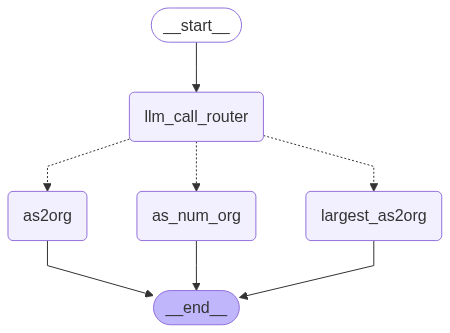

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'The University of Chicago'}, 'id': 'call_EFU4kInUYlWeicAAKycgxhgs', 'type': 'tool_call'}]
2
Agent answer: 2 

Ground truth: 10 



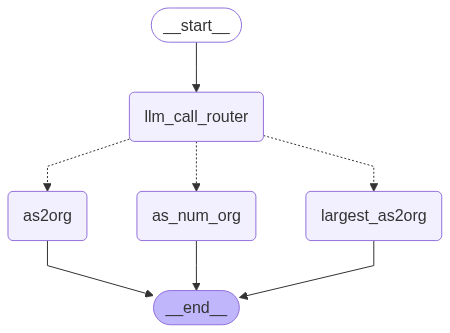

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'China Internet Network Infomation Center'}, 'id': 'call_vmHxJ4rFv5K8ttzqydCZrmK0', 'type': 'tool_call'}]
10
Agent answer: 10 

Ground truth: 1 



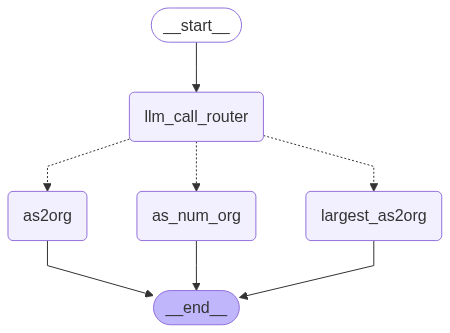

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Urban Lending Solutions'}, 'id': 'call_gncL5s0Yvr0M2llX4yzFXTUX', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 1 



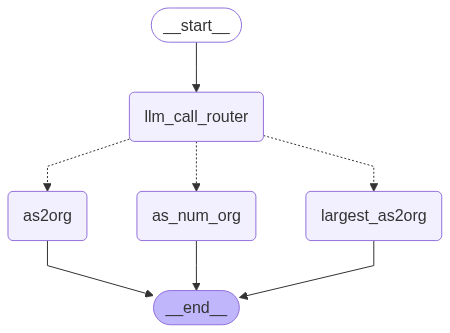

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Brooklyn Law School'}, 'id': 'call_LDOcFgJLYZkLwSOQHVLKk1UJ', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 33 



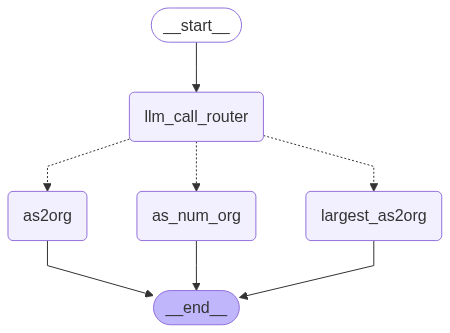

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'One New Zealand Group Limited'}, 'id': 'call_ISgfze7ggdVlrT6vKvyaxcqe', 'type': 'tool_call'}]
33
Agent answer: 33 

Ground truth: 20 



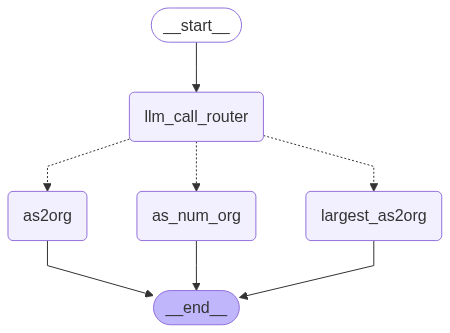

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Crown Castle Fiber LLC'}, 'id': 'call_vdft0HdmSAEkrvE70pCxzVow', 'type': 'tool_call'}]
20
Agent answer: 20 

Ground truth: 2 



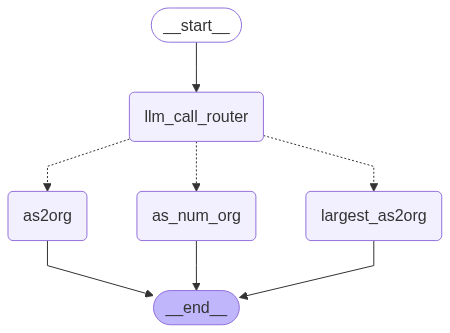

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Hadara Technologies Private Shareholding Company'}, 'id': 'call_CM6CxdFJhJTqSM9z6W8ayyG1', 'type': 'tool_call'}]
2
Agent answer: 2 

Ground truth: 1 



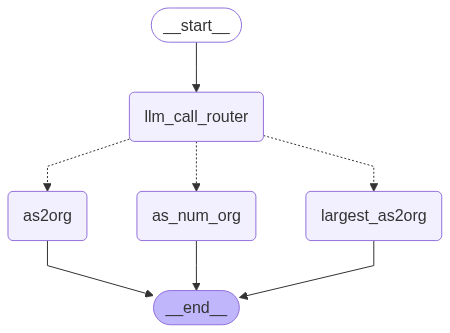

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Lodden Services'}, 'id': 'call_lqnvNjRX7nQWPoCzmZKRnisj', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 23 



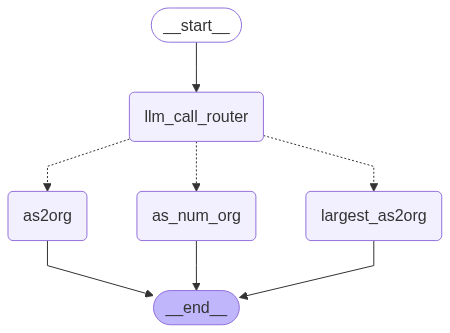

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'VERO S.A'}, 'id': 'call_imehpOKbQ5o7TMz15ppxASQV', 'type': 'tool_call'}]
23
Agent answer: 23 

Ground truth: 1 



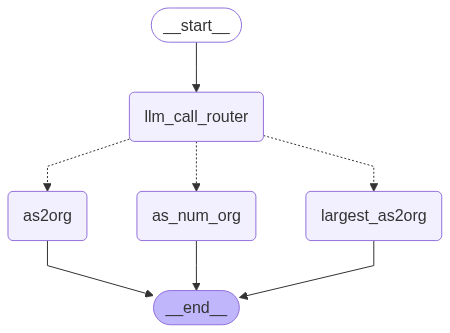

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Eonix Corporation'}, 'id': 'call_oWoMLEfZFG1zVa8kCTLliuul', 'type': 'tool_call'}]
1
Agent answer: 1 

Ground truth: 6 



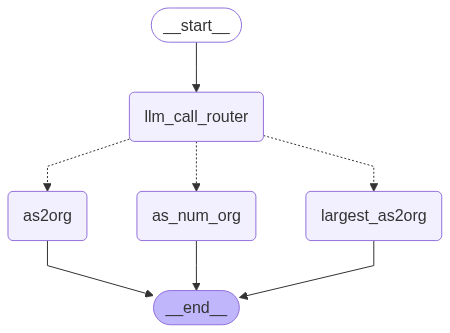

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'Nokia Solutions and Networks Oy'}, 'id': 'call_R20yyDyUkeUvL9ACocgTKRvg', 'type': 'tool_call'}]
6
Agent answer: 6 

Ground truth: 1 



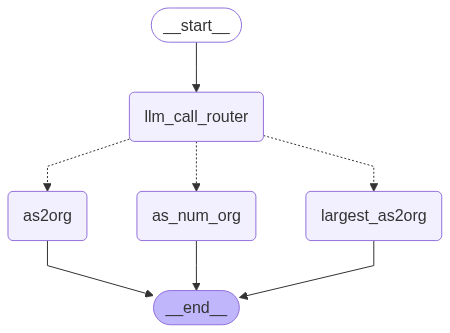

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'org_as_count', 'args': {'org': 'JM Family Enterprises Inc.'}, 'id': 'call_fdlrgC3pjeGUWeShu9cPPA84', 'type': 'tool_call'}]
1
Agent answer: 1 

Accuracy: 94.0 %



In [13]:
num_of_as2org_accuracy = eval_num_of_asns_org_dataset("Give a short answer to the following question, without listing all the ASNs:",
                   model,
                   judge_model=model,
                   model_type='Route',
                   tools=tools,
                   test_set=orgs_data)

**Task 3 - AS2Org**

In [14]:
as2org_eval_dataset_path = 'evaluations/as2org/as2org.json'
with open(as2org_eval_dataset_path, 'r') as f:
    as2org_data = json.load(f)

In [15]:
as2org_data = dict(list(as2org_data.items())[:50])

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


Ground truth: ['NTT Network Innovation Laboratories', 'NTT NTLab', 'Nippon Telegraph and Telephone Corporation'] 



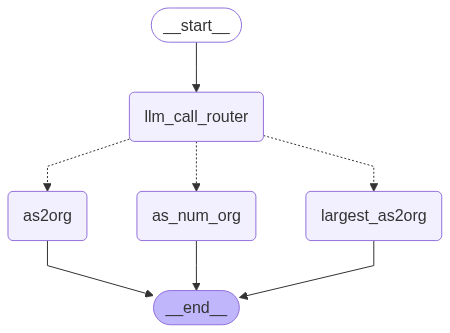

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 173}, 'id': 'call_pjl27PdOKkM2PSvJ2OIFYyw7', 'type': 'tool_call'}]
Nippon Telegraph and Telephone Corporation
Agent answer: Nippon Telegraph and Telephone Corporation 

Ground truth: ['NTT Network Innovation Laboratories', 'NTT NTLab', 'Nippon Telegraph and Telephone Corporation'] 



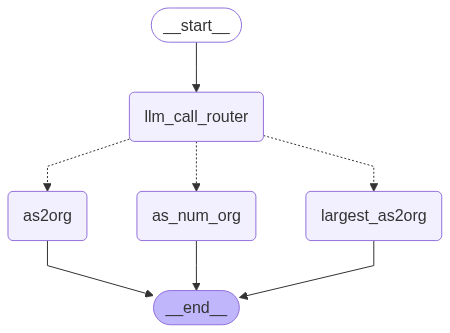

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 4697}, 'id': 'call_PrbYYmuzIVXq97NWgJIvtwWD', 'type': 'tool_call'}]
Nippon Telegraph and Telephone Corporation
Agent answer: Nippon Telegraph and Telephone Corporation 

Ground truth: ['NTT Network Innovation Laboratories', 'NTT NTLab', 'Nippon Telegraph and Telephone Corporation'] 



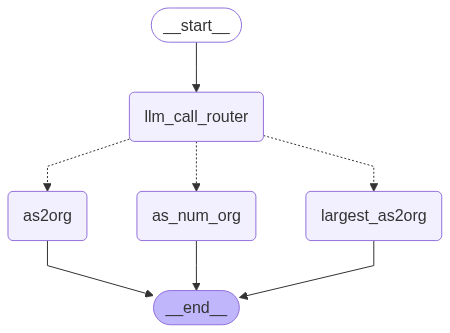

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 4710}, 'id': 'call_yzC0bCr2In08ZtWPmeXG9a1o', 'type': 'tool_call'}]
Nippon Telegraph and Telephone Corporation
Agent answer: Nippon Telegraph and Telephone Corporation 

Ground truth: ['NTT Network Innovation Laboratories', 'NTT NTLab', 'Nippon Telegraph and Telephone Corporation'] 



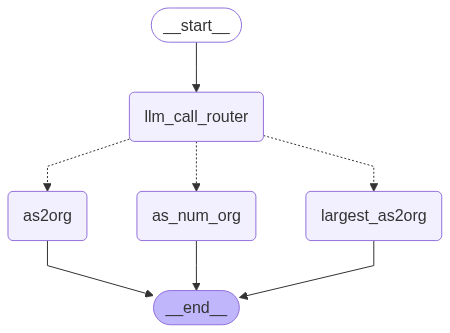

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 55817}, 'id': 'call_7vokXsAILp1MBusSD9RnCbRN', 'type': 'tool_call'}]
Nippon Telegraph and Telephone Corporation
Agent answer: Nippon Telegraph and Telephone Corporation 

Ground truth: ['Telstra Corporation Ltd', 'Telstra Limited', 'Telstra Purple Hosting Services', 'Belong (Telstra Limited)', 'Telstra CIR (Telstra Limited)', 'Telstra Corporation Limited', 'Telstra Limited', 'Telstra Managed Network Services', 'Telstra UC MAPS Network (Telstra Limited)', 'Telstra Limited'] 



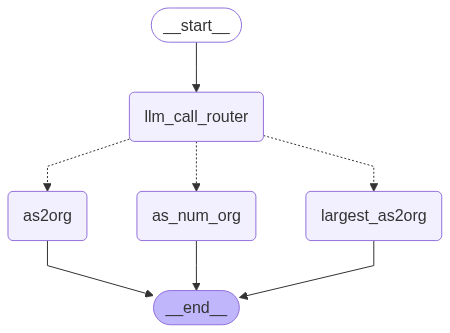

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 9514}, 'id': 'call_eqfLSZA2M9ng0KEWvt2VnOT8', 'type': 'tool_call'}]
Telstra Limited
Agent answer: Telstra Limited 

Ground truth: ['Telstra Corporation Ltd', 'Telstra Limited', 'Telstra Purple Hosting Services', 'Belong (Telstra Limited)', 'Telstra CIR (Telstra Limited)', 'Telstra Corporation Limited', 'Telstra Limited', 'Telstra Managed Network Services', 'Telstra UC MAPS Network (Telstra Limited)', 'Telstra Limited'] 



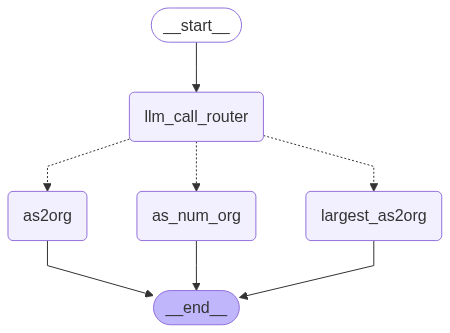

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 1221}, 'id': 'call_kJvEn8hypk2LEWTc2lYsjATj', 'type': 'tool_call'}]
Telstra Limited
Agent answer: Telstra Limited 

Ground truth: ['Telstra Corporation Ltd', 'Telstra Limited', 'Telstra Purple Hosting Services', 'Belong (Telstra Limited)', 'Telstra CIR (Telstra Limited)', 'Telstra Corporation Limited', 'Telstra Limited', 'Telstra Managed Network Services', 'Telstra UC MAPS Network (Telstra Limited)', 'Telstra Limited'] 



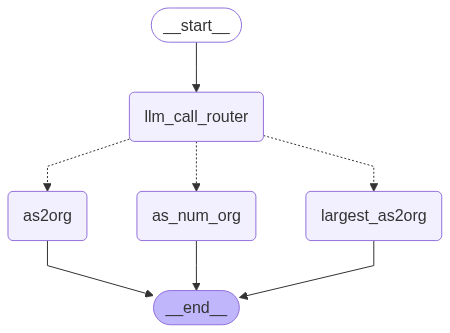

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 132029}, 'id': 'call_8sUksMWc0J5hEUu5lye8gj7K', 'type': 'tool_call'}]
Telstra Limited
Agent answer: Telstra Limited 

Ground truth: ['Telstra Corporation Ltd', 'Telstra Limited', 'Telstra Purple Hosting Services', 'Belong (Telstra Limited)', 'Telstra CIR (Telstra Limited)', 'Telstra Corporation Limited', 'Telstra Limited', 'Telstra Managed Network Services', 'Telstra UC MAPS Network (Telstra Limited)', 'Telstra Limited'] 



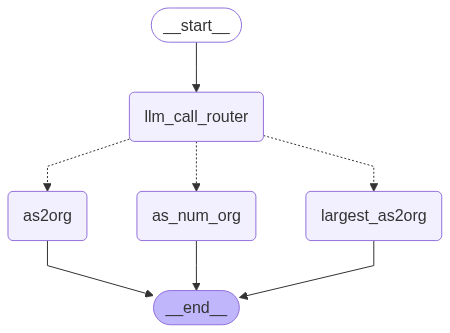

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 132292}, 'id': 'call_WF3dVALQpZt4xpagvoLj2UWy', 'type': 'tool_call'}]
Telstra Limited
Agent answer: Telstra Limited 

Ground truth: ['Telstra Corporation Ltd', 'Telstra Limited', 'Telstra Purple Hosting Services', 'Belong (Telstra Limited)', 'Telstra CIR (Telstra Limited)', 'Telstra Corporation Limited', 'Telstra Limited', 'Telstra Managed Network Services', 'Telstra UC MAPS Network (Telstra Limited)', 'Telstra Limited'] 



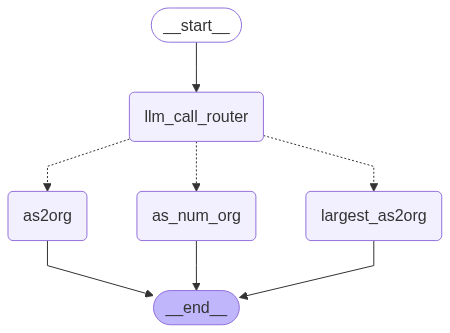

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 133859}, 'id': 'call_CapzdiZTt7ZFU2WBF0Ja85Pp', 'type': 'tool_call'}]
Telstra Limited
Agent answer: Telstra Limited 

Ground truth: ['Telstra Corporation Ltd', 'Telstra Limited', 'Telstra Purple Hosting Services', 'Belong (Telstra Limited)', 'Telstra CIR (Telstra Limited)', 'Telstra Corporation Limited', 'Telstra Limited', 'Telstra Managed Network Services', 'Telstra UC MAPS Network (Telstra Limited)', 'Telstra Limited'] 



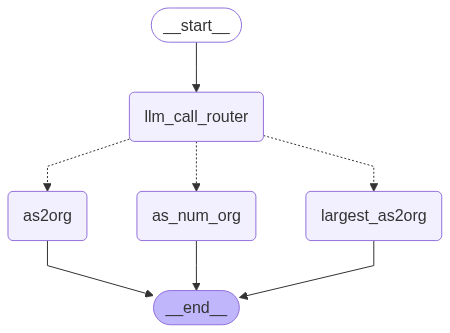

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 135313}, 'id': 'call_guPJB3BXy6K5tNcYt8y3oB8Q', 'type': 'tool_call'}]
Telstra Limited
Agent answer: Telstra Limited 

Ground truth: ['Telstra Corporation Ltd', 'Telstra Limited', 'Telstra Purple Hosting Services', 'Belong (Telstra Limited)', 'Telstra CIR (Telstra Limited)', 'Telstra Corporation Limited', 'Telstra Limited', 'Telstra Managed Network Services', 'Telstra UC MAPS Network (Telstra Limited)', 'Telstra Limited'] 



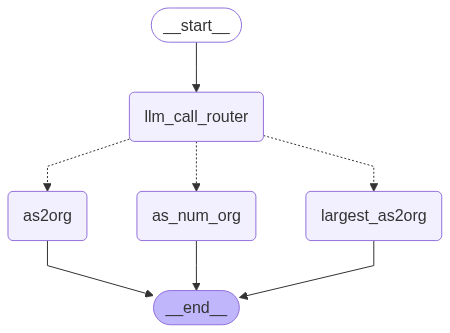

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 141886}, 'id': 'call_ySzdTTtPBrHx47BqeRnrUcuZ', 'type': 'tool_call'}]
Telstra Limited
Agent answer: Telstra Limited 

Ground truth: ['FUJITSU LIMITED', 'Fujitsu Limited', 'Fujitsu Limited AS58793', 'FUJITSU LIMITED'] 



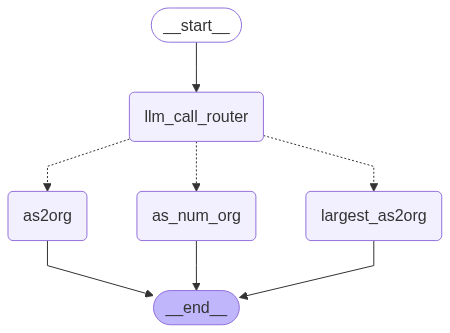

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 58793}, 'id': 'call_CrFmCirykQv7etGQzTc1sF0y', 'type': 'tool_call'}]
FUJITSU LIMITED
Agent answer: FUJITSU LIMITED 

Ground truth: ['KDDI', 'KDDI (former POWEREDCOM)', 'KDDI CORPORATION', 'KDDI CORPORATION'] 



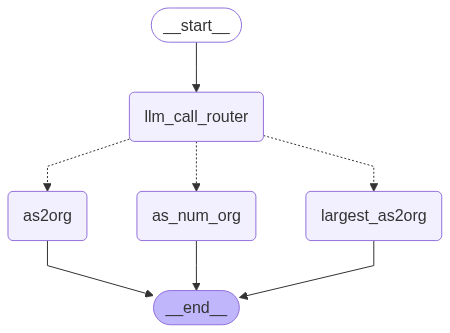

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 18089}, 'id': 'call_vVji6lo7u3yESo2IXr4JCl2j', 'type': 'tool_call'}]
KDDI CORPORATION
Agent answer: KDDI CORPORATION 

Ground truth: ['KDDI', 'KDDI (former POWEREDCOM)', 'KDDI CORPORATION', 'KDDI CORPORATION'] 



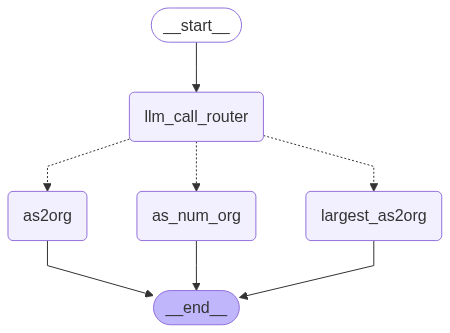

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 2516}, 'id': 'call_0L9ixJVtdcHojyqSVxO3hcOV', 'type': 'tool_call'}]
KDDI CORPORATION
Agent answer: KDDI CORPORATION 

Ground truth: ['KDDI', 'KDDI (former POWEREDCOM)', 'KDDI CORPORATION', 'KDDI CORPORATION'] 



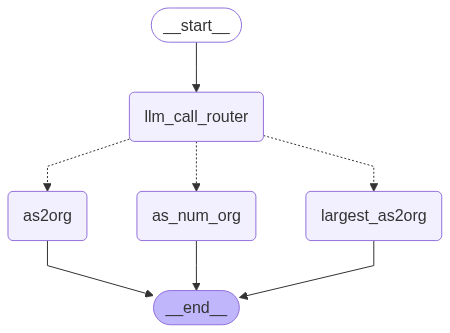

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 4716}, 'id': 'call_8WPQMnR0lBjkyFCWgTwnQkN1', 'type': 'tool_call'}]
KDDI CORPORATION
Agent answer: KDDI CORPORATION 

Ground truth: ['KDDI', 'KDDI (former POWEREDCOM)', 'KDDI CORPORATION', 'KDDI CORPORATION'] 



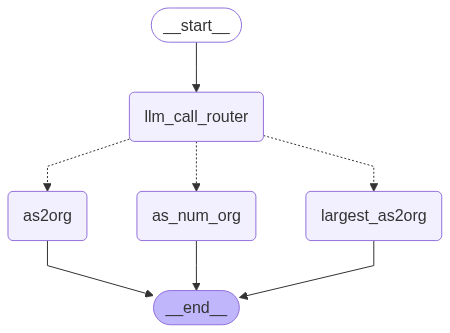

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 9996}, 'id': 'call_7V7xi25QUJhuqv0pfl7hIgM2', 'type': 'tool_call'}]
KDDI CORPORATION
Agent answer: KDDI CORPORATION 

Ground truth: ['So-net Corporation (bit-drive)', 'Sony Network Communications Inc.'] 



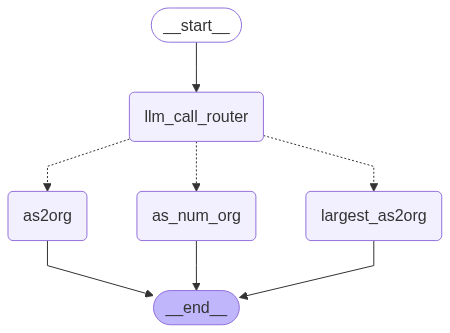

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 9600}, 'id': 'call_lazzrojHafWlEaas2cPuiXq2', 'type': 'tool_call'}]
Sony Network Communications Inc.
Agent answer: Sony Network Communications Inc. 

Ground truth: ['Network For Learning - Spark Digital New Zealand', 'Spark New Zealand Trading Limited', 'Spark New Zealand Trading Ltd.', 'Spark Ventures', 'Network for Learning', 'SPark Digital Service Delivery Platform,', 'Spark Digital New Zealand Ltd', 'Spark New Zealand Trading Ltd'] 



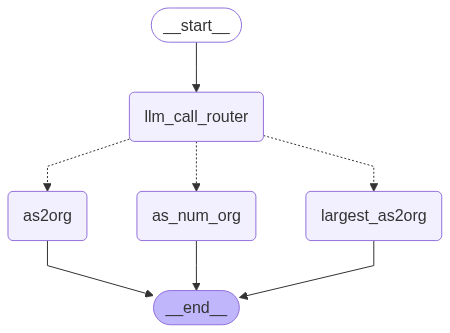

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 133124}, 'id': 'call_hcckG0BoHeVTSwTKsTEBcGSa', 'type': 'tool_call'}]
Spark Ventures
Agent answer: Spark Ventures 

Ground truth: ['Network For Learning - Spark Digital New Zealand', 'Spark New Zealand Trading Limited', 'Spark New Zealand Trading Ltd.', 'Spark Ventures', 'Network for Learning', 'SPark Digital Service Delivery Platform,', 'Spark Digital New Zealand Ltd', 'Spark New Zealand Trading Ltd'] 



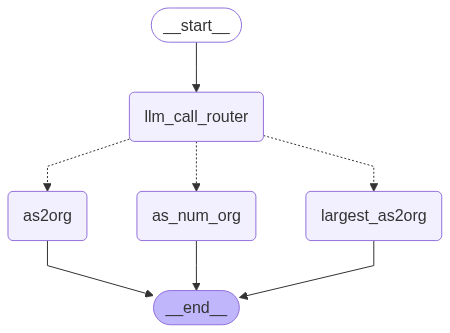

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 133420}, 'id': 'call_7kQYlWXHw7YsfBpmlXL8uzSU', 'type': 'tool_call'}]
Spark Ventures
Agent answer: Spark Ventures 

Ground truth: ['Network For Learning - Spark Digital New Zealand', 'Spark New Zealand Trading Limited', 'Spark New Zealand Trading Ltd.', 'Spark Ventures', 'Network for Learning', 'SPark Digital Service Delivery Platform,', 'Spark Digital New Zealand Ltd', 'Spark New Zealand Trading Ltd'] 



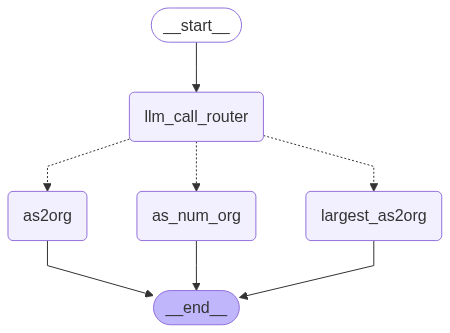

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 133473}, 'id': 'call_wIYWDUUiEipO5UNXCokGXENV', 'type': 'tool_call'}]
Spark Ventures
Agent answer: Spark Ventures 

Ground truth: ['Network For Learning - Spark Digital New Zealand', 'Spark New Zealand Trading Limited', 'Spark New Zealand Trading Ltd.', 'Spark Ventures', 'Network for Learning', 'SPark Digital Service Delivery Platform,', 'Spark Digital New Zealand Ltd', 'Spark New Zealand Trading Ltd'] 



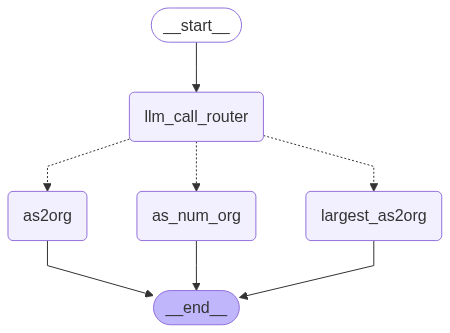

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 2569}, 'id': 'call_L3iePZZmQ5qqp4SI8RSHx7eC', 'type': 'tool_call'}]
Spark Ventures
Agent answer: Spark Ventures 

Ground truth: ['LG DACOM Corporation', 'LG DACOM Corporation', 'LG Uplus Corp.', 'LG DACOM Corporation'] 



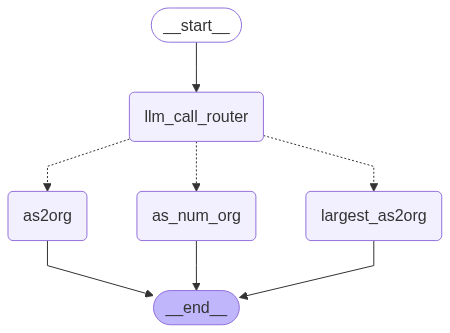

/usr/local/lib/python3.11/dist-packages/langchain_openai/chat_models/base.py:1844: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


[{'name': 'as2org', 'args': {'asn': 3786}, 'id': 'call_0VDDDctc9SNbPzle1wqVccXb', 'type': 'tool_call'}]
LG DACOM Corporation
Agent answer: LG DACOM Corporation 

Accuracy: 100.0 %



In [16]:
as2org_results = eval_as2org_dataset("Give a short answer to the following question:",
                             model,
                             judge_model=model,
                             model_type='Route',
                             tools=tools,
                             test_set=as2org_data)

**Results**

In [17]:
print("Results:")
print("Largest AS in organization results: " + str(largest_as2org_accuracy ) + "%")
print("Number of ASes in organization results: " + str(num_of_as2org_accuracy) + "%")
print("AS2Org results:" + str(as2org_results) + "%")

Results:
Largest AS in organization results: 74.0%
Number of ASes in organization results: 94.0%
AS2Org results:100.0%
